In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate 1000 levels ranging from 1 to 1000
levels = np.arange(1, 1001)

# Generate salaries using a polynomial relationship with some noise
salaries = 5000 * (levels ** 2) + 100000 * levels + np.random.randint(0, 1000000, size=len(levels))

# Create DataFrame
df = pd.DataFrame({'Level': levels, 'Salary': salaries})


In [7]:
df.head(4)

,Level,Salary
0,1,226958
1,2,891155
2,3,476932
3,4,845838


In [8]:
df.shape

(1000, 2)

In [10]:
df.corr()

,Level,Salary
Level,1.000000,0.969481
Salary,0.969481,1.000000


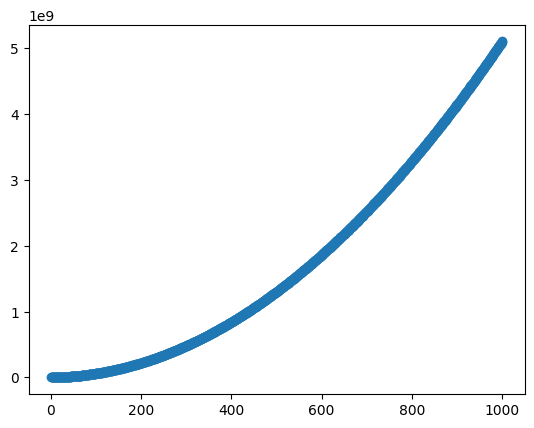

In [9]:
plt.scatter(df["Level"], df["Salary"])

In [11]:
x = df[["Level"]]
y = df["Salary"]

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
pf = PolynomialFeatures(degree=2)
pf.fit(x)
x = pf.transform(x)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

In [21]:
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [22]:
lr.score(x_test, y_test)

0.9999999659428306

In [31]:
# y = m1x1+m2x2^2+c
#  y = 100049.33642737*x1 + 4999.94082255*x2^2 + 479138.4029672146

In [29]:
lr.coef_

array([     0.        , 100049.33642737,   4999.94082255])

In [30]:
lr.intercept_

479138.4029672146

In [23]:
prd = lr.predict(x)

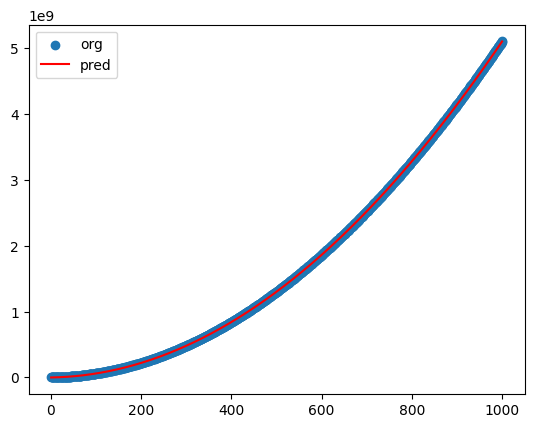

In [27]:
plt.scatter(df["Level"], df["Salary"])
plt.plot(df["Level"], prd, c="red")
plt.legend(["org", "pred"])
plt.show()

In [32]:
# How to deploy this model

In [33]:
test = pf.transform([[45]])
test

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.000e+00, 4.500e+01, 2.025e+03]])

In [34]:
lr.predict(test)

array([15106238.70787072])